## Task-1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Data/Task2Data.csv')
df

,id,Nodes,Tasks/Node,Threads/Task,Runtime Program / s,Scale,Plastic,Avg. Neuron Build Time / s,Min. Edge Build Tim e / s,Max. Edge Build Time / s,...,Max. Init. Time / s,Presim. Time / s,Sim. Time / s,Virt. Memor y (Sum) / kB,Local Spike Counter (Sum),Average Rate (Sum),Number of Neurons,Number of Connections,Min. Delay,Max. Delay 5
0,5,1,4,4,200.84,10,True,0.15,46.03,46.34,...,1.01,7.87,142.97,46903088,802865,7.03,112500,1265738500,1.5,1.5
1,5,1,2,8,202.15,10,True,0.28,47.98,48.48,...,1.20,7.95,142.81,47699384,802865,7.03,112500,1265738500,1.5,1.5
2,5,1,4,8,89.57,10,True,0.15,20.41,23.21,...,3.04,3.19,60.31,46813040,821491,7.23,112500,1265738500,1.5,1.5
3,5,2,2,4,164.16,10,True,0.20,40.03,41.09,...,1.58,6.08,114.88,46937216,802865,7.03,112500,1265738500,1.5,1.5
4,5,2,4,4,77.68,10,True,0.13,20.93,21.22,...,0.46,3.12,52.05,47362064,821491,7.23,112500,1265738500,1.5,1.5
5,5,2,2,8,79.60,10,True,0.20,21.63,21.91,...,0.47,2.98,53.12,46847168,821491,7.23,112500,1265738500,1.5,1.5
6,5,2,4,8,37.20,10,True,0.13,10.08,11.60,...,1.63,1.24,23.29,47065232,818198,7.33,112500,1265738500,1.5,1.5
7,5,3,2,4,96.51,10,True,0.15,26.54,27.41,...,1.22,3.33,64.28,52256880,813743,7.27,112500,1265738500,1.5,1.5


In [6]:
df.insert(df.shape[1] - 1, "Threads", df["Nodes"]*df["Tasks/Node"]*df["Threads/Task"]) 
df.sort_values(["Threads", "Nodes", "Tasks/Node", "Threads/Task"], inplace=True) 

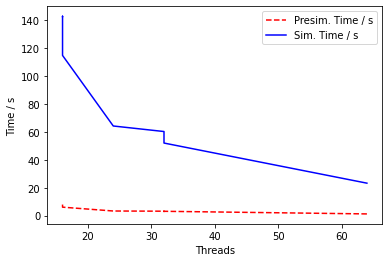

In [7]:
fig, ax = plt.subplots()
ax.plot(df["Threads"], df["Presim. Time / s"], linestyle="dashed", color="red", label="Presim. Time / s") 
ax.plot(df["Threads"], df["Sim. Time / s"], "-b", label="Sim. Time / s")
ax.set_xlabel("Threads") 
ax.set_ylabel("Time / s") 
ax.legend(loc='best');

## Task-2

In [10]:
df = pd.read_csv(r'../Data/Sales.csv')
df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


# Customer Gender Distribution by Product Category

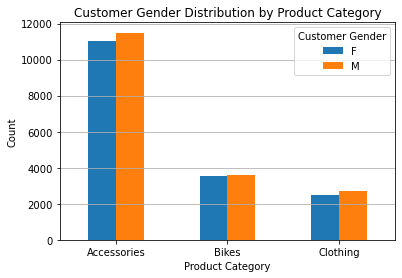

In [11]:
gender_category_counts = df.groupby(['Product Category', 'Customer Gender']).size().unstack()

gender_category_counts.plot(kind='bar', stacked=False)  
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Customer Gender Distribution by Product Category')
plt.xticks(rotation=0)  
plt.grid(True, axis='y')
plt.show()

## 1.Explanation of Customer Gender Distribution by Product Category chart

1. According to the chart, there is a higher number of male customers compared to female customers in the Accessories, Bikes, and Clothing categories.

# Total Revenue by Country

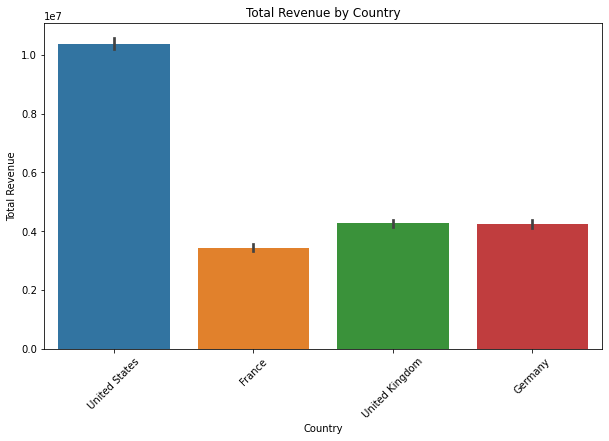

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Revenue', data=df, estimator=sum)
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

## 2.Explanation of Total Revenue by Country chart

2. The chart suggests that the United States generates considerably more revenue than France, the United Kingdom, and Germany. Among the four, France has the lowest revenue, while the United Kingdom and Germany have relatively similar revenue figures.